# Importando Bibliotecas

In [1262]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

# Carregando e inspecionando dados do .csv para o DATAFRAME

In [1263]:
main_df = pd.read_csv(
  "./data/card_transdata.csv", 
  na_values=[' ', '_', '_______'], # Substituindo com NaN os valores ao o dataset demonstrados ao lado
  low_memory=False #
)

# Mostrando as 5 primeiras linhas do DATAFRAME ORIGINAL

In [1264]:
main_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Mostrando o formato do DATAFRAME ORIGINAL


In [1265]:
# número de colunas
print(f'columns: {main_df.shape[1]}')

# número de linhas
print(f'rows: {main_df.shape[0]}')

columns: 8
rows: 1000000


# Obtendo informações sobre cada variável do DATAFRAME ORIGINAL

In [1266]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Limpeza de dados do DATAFRAME ORIGINAL

### 1. Valores ausentes

In [1267]:
# Verificando a soma dos valores ausentes para cada coluna
main_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### 2. Valores duplicados

In [1268]:
# Verificando a soma das linhas duplicadas
print(f'duplicate rows: {main_df.duplicated().sum()}')

duplicate rows: 0


# Algumas informações estatísticas do DATAFRAME ORIGINAL

In [1269]:
# Criando uma tabela de estatísticas descritivas para dados
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME ORIGINAL

## Recursos Numéricos

### Distribuição das Distâncias de Casa

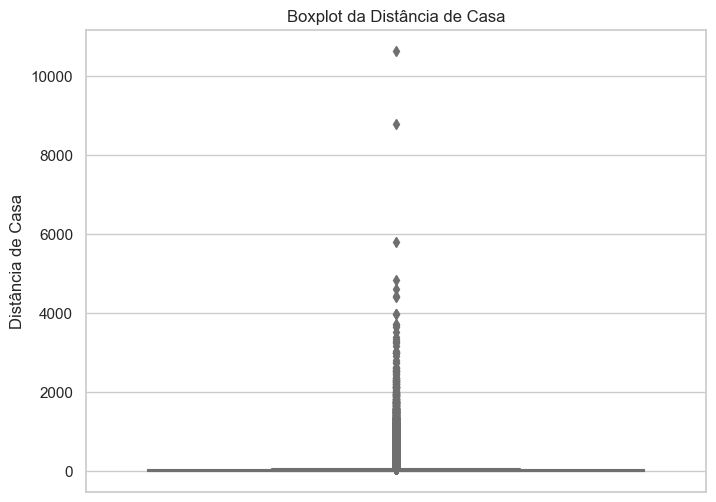

In [1270]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=main_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

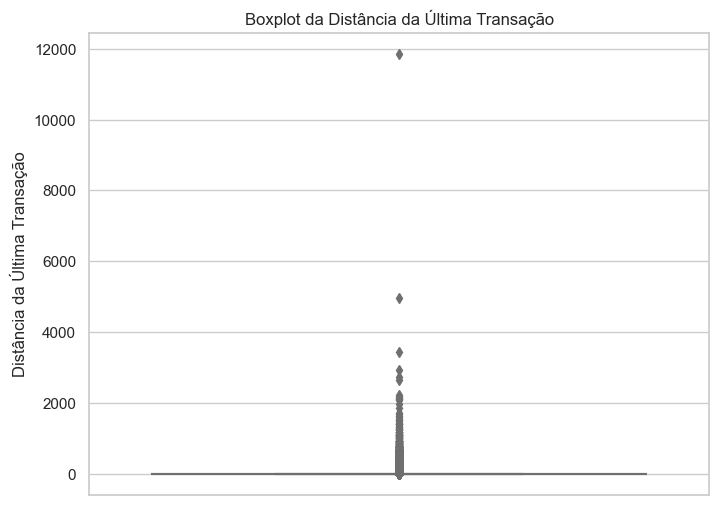

In [1271]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=main_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

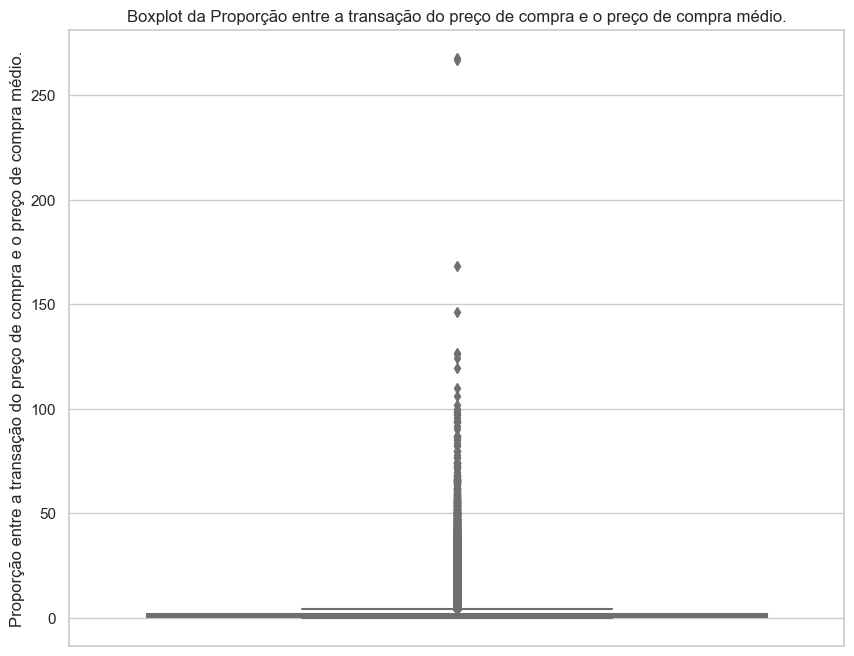

In [1272]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=main_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

In [1273]:
# Criando uma lista contendo os recursos numéricos
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

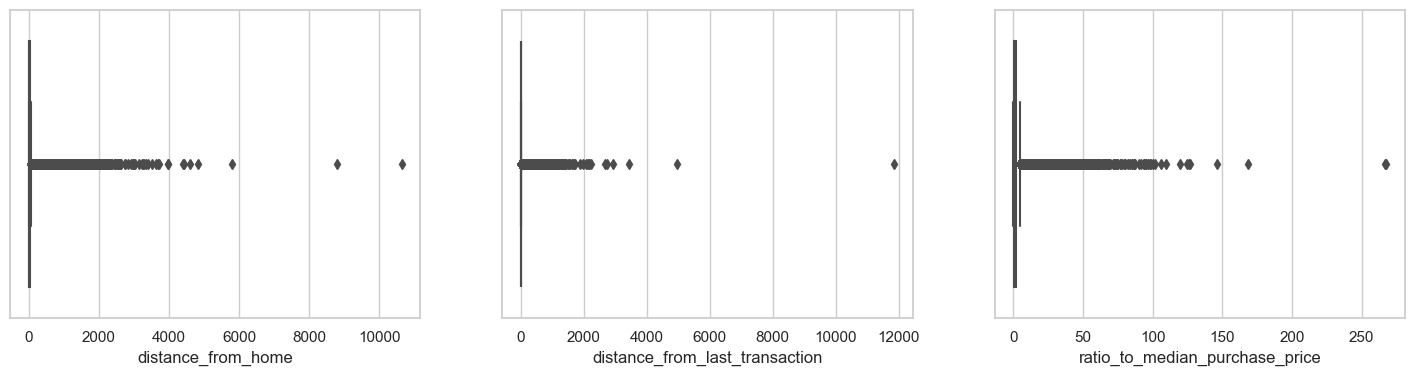

In [1274]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica para detectar os outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=main_df, x=col)
plt.show()

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [1275]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = main_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64

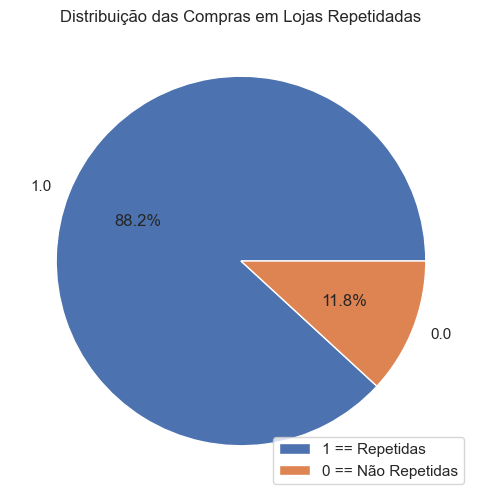

In [1276]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [1277]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = main_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64

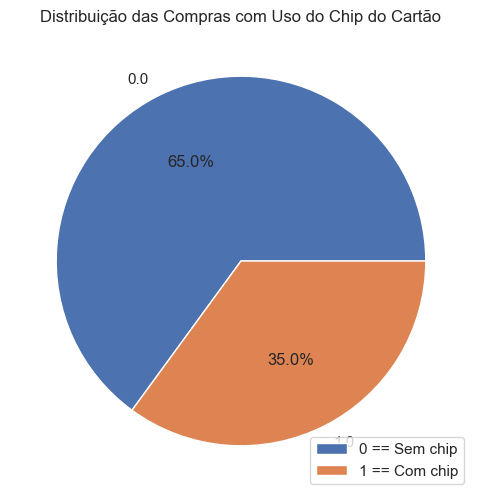

In [1278]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [1279]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = main_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64

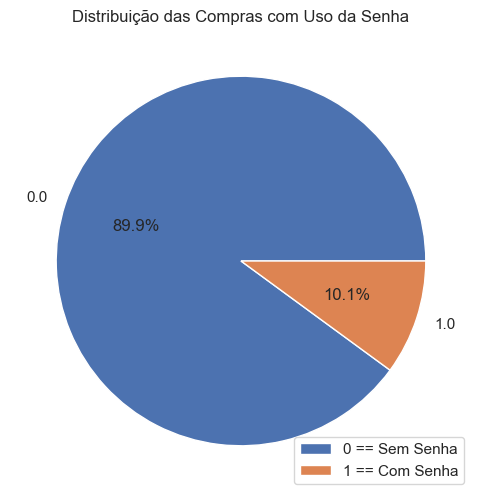

In [1280]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [1281]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = main_df['online_order'].value_counts()
online_order_count

online_order
1.0    650552
0.0    349448
Name: count, dtype: int64

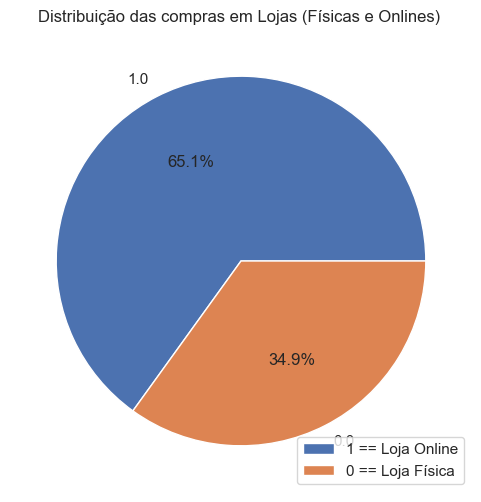

In [1282]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Fraudes

In [1283]:
# Contando os valores únicos na coluna 'fraud'
fraud_count = main_df['fraud'].value_counts()
fraud_count

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

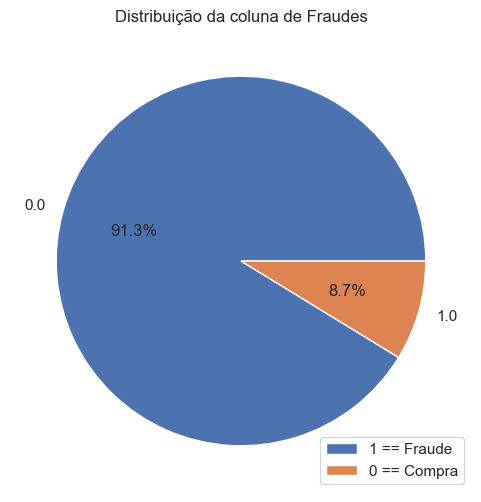

In [1284]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'fraud_count' 
plt.figure(figsize=(6, 6))
plt.pie(fraud_count.values, labels=fraud_count.index, autopct='%1.1f%%')
plt.title('Distribuição da coluna de Fraudes')

# Adicionando legendas
legend_labels = ['1 == Fraude', '0 == Compra']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

In [1285]:
# Criando uma lista contendo os recursos categóricos
category_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

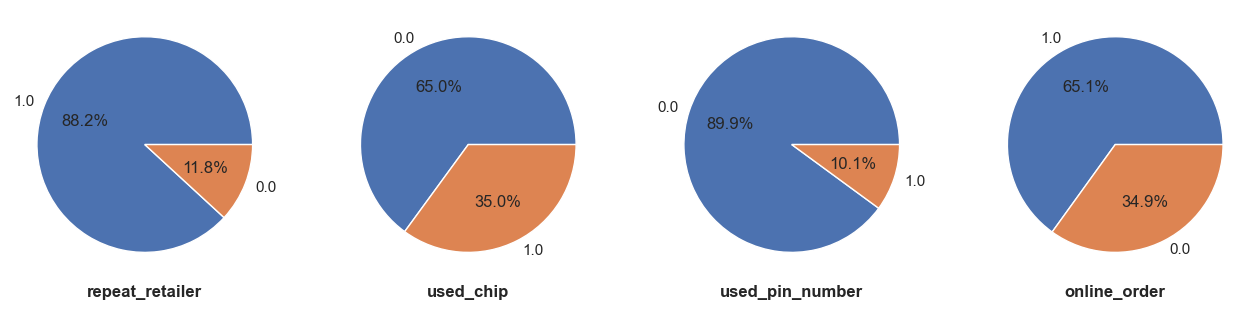

In [1286]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = main_df[col].value_counts().values, 
            labels=main_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Excluindo os valores que NÃO são FRAUDES

## Copiando o DATAFRAME ORIGINAL e atribuindo a uma variável DATAFRAME DE FRAUDE, excluindo valores que NÃO são FRAUDES e depois excluindo a coluna de "fraud" do DATAFRAME DE FRAUDE

In [1287]:
# Removendo todas as linhas onde 'fraud' é igual a 0
fraud_df = main_df[main_df['fraud'] != 0]

# Redefinindo o índice do DataFrame
fraud_df.reset_index(drop=True, inplace=True)

# Removendo a coluna 'fraud'
fraud_df = fraud_df.drop('fraud', axis=1) 

# Apresentando o DATAFRAME DE FRAUDE 

In [1288]:
fraud_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


# Mostrando o formato do DATAFRAME DE FRAUDE

In [1289]:
# número de colunas
print(f'columns: {fraud_df.shape[1]}')

# número de linhas
print(f'rows: {fraud_df.shape[0]}')

columns: 7
rows: 87403


# Algumas informações estatísticas do DATAFRAME DE FRAUDE

In [1290]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME DE FRAUDE

## Recursos Numéricos

### Distribuição das Distâncias de Casa

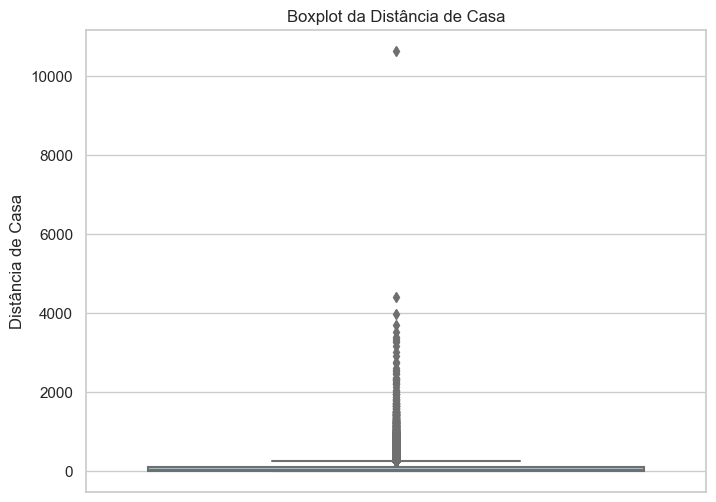

In [1291]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

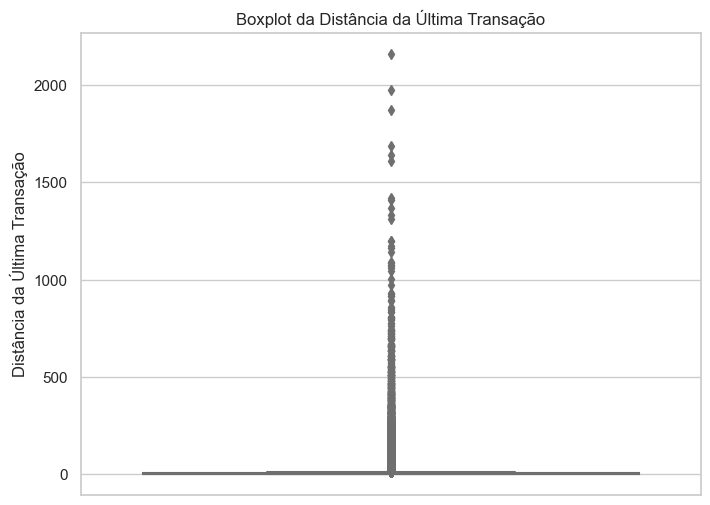

In [1292]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

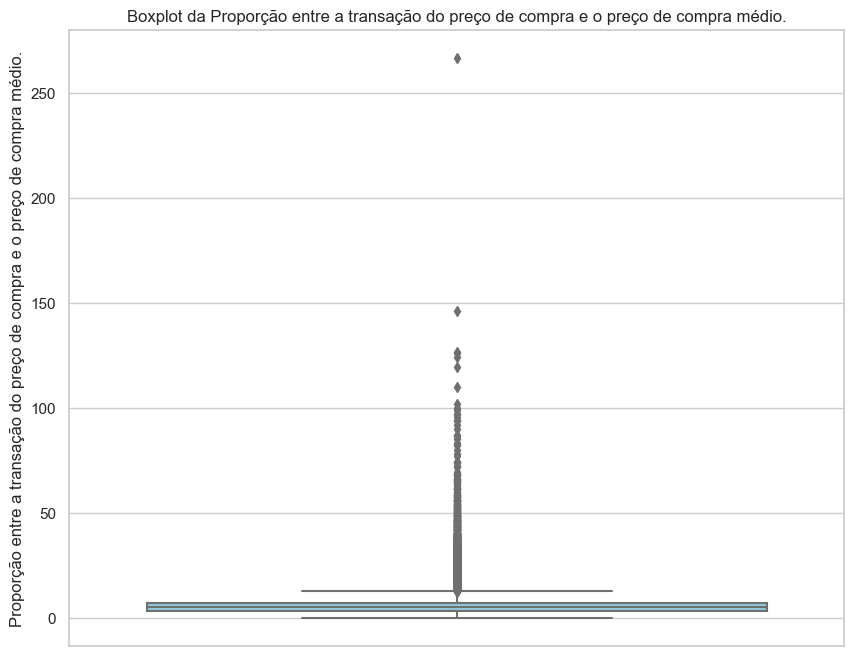

In [1293]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

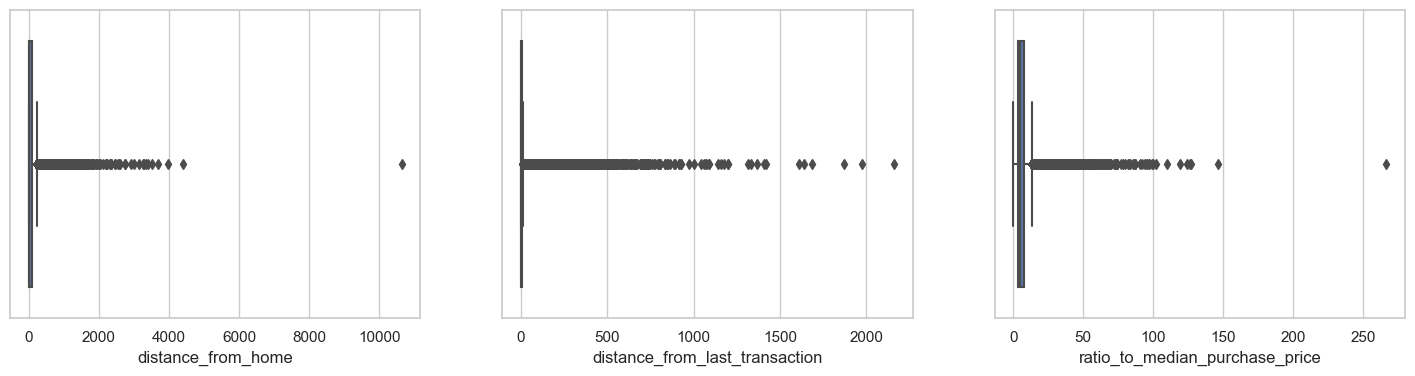

In [1294]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica para detectar os outliers
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=fraud_df, x=col)
plt.show()

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [1295]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = fraud_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    76925
0.0    10478
Name: count, dtype: int64

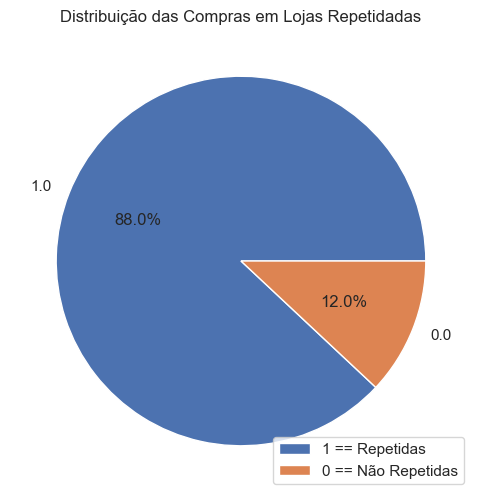

In [1296]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [1297]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = fraud_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    64993
1.0    22410
Name: count, dtype: int64

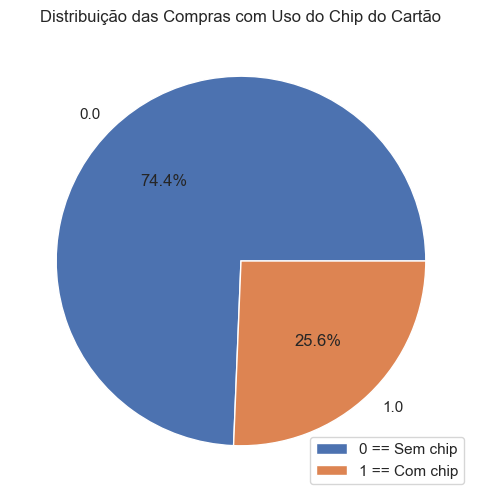

In [1298]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [1299]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = fraud_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    87130
1.0      273
Name: count, dtype: int64

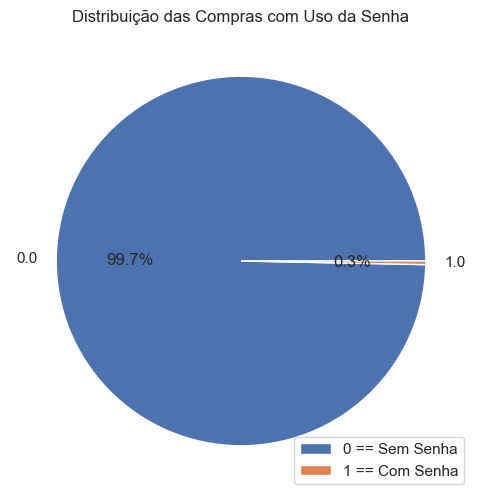

In [1300]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [1301]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = fraud_df['online_order'].value_counts()
online_order_count

online_order
1.0    82711
0.0     4692
Name: count, dtype: int64

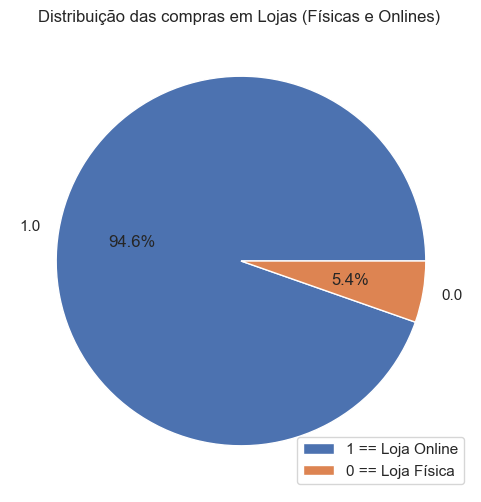

In [1302]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

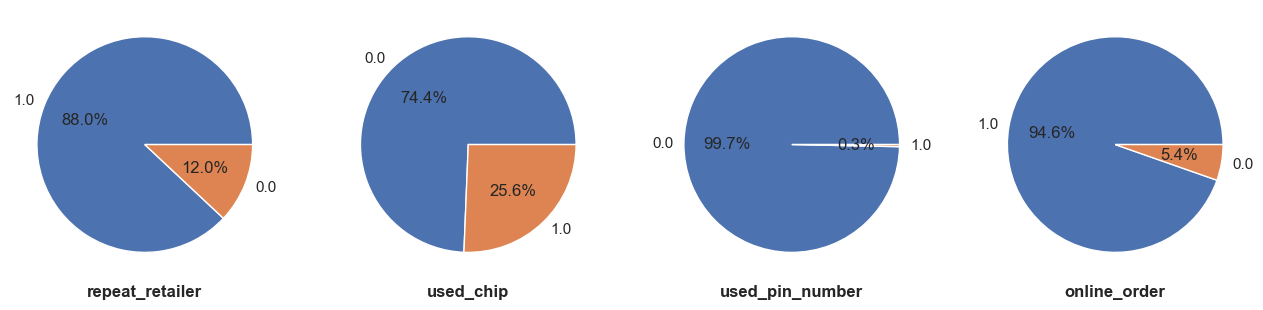

In [1303]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x=fraud_df[col].value_counts().values, 
            labels=fraud_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Exemplos de análise dos dados fornecidos pelo professor e implementado nessa df

In [1304]:
#analise = sv.analyze(fraud_df)
#analise.show_html('sweetviz.html')
#
#prof = ProfileReport(fraud_df)
#prof.to_file(output_file='pandasprof.html')

# Removendo Outliers de Recursos Numéricos do DATAFRAME DE FRAUDE

## Copiando o DATAFRAME DE FRAUDE, atribuindo a uma variável DATAFRAME SEM OUTLIERS e removendo os valores outliers

In [1305]:
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
Q1 = fraud_df[num_features].quantile(0.25)
Q3 = fraud_df[num_features].quantile(0.75)
IQR = Q3 - Q1
fraud_cleaned_df = fraud_df[~((fraud_df[num_features] < (Q1 - 1.5 * IQR)) | (fraud_df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1306]:
# Redefinindo o índice do DataFrame
fraud_cleaned_df.reset_index(drop=True, inplace=True)

# Apresentando o DATAFRAME SEM OUTLIERS

In [1307]:
fraud_cleaned_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
1,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
2,2.530145,3.689781,8.297407,1.0,0.0,0.0,1.0
3,21.126116,0.271987,6.081771,1.0,0.0,0.0,1.0
4,151.370437,5.340081,1.171567,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
64376,106.330689,0.819417,0.750926,1.0,0.0,0.0,1.0
64377,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
64378,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
64379,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0


# Mostrando o formato do DATAFRAME SEM OUTLIERS

In [1308]:
# número de colunas
print(f'columns: {fraud_cleaned_df.shape[1]}')

# número de linhas
print(f'rows: {fraud_cleaned_df.shape[0]}')

columns: 7
rows: 64381


# Algumas informações estatísticas do DATAFRAME SEM OUTLIERS

In [1309]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,64381.0,47.055662,61.384797,0.025847,4.450936,14.513070,78.965092,245.856874
distance_from_last_transaction,64381.0,1.759370,2.262137,0.000407,0.262978,0.809542,2.308785,11.000464
ratio_to_median_purchase_price,64381.0,5.409294,2.861487,0.013585,4.189452,5.169586,6.974200,13.076980
repeat_retailer,64381.0,0.878551,0.326651,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,64381.0,0.272984,0.445496,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,64381.0,0.001817,0.042591,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,64381.0,0.952874,0.211909,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME SEM OUTLIERS

## Recursos Numéricos do DATAFRAME SEM OUTLIERS

### Distribuição das Distâncias de Casa

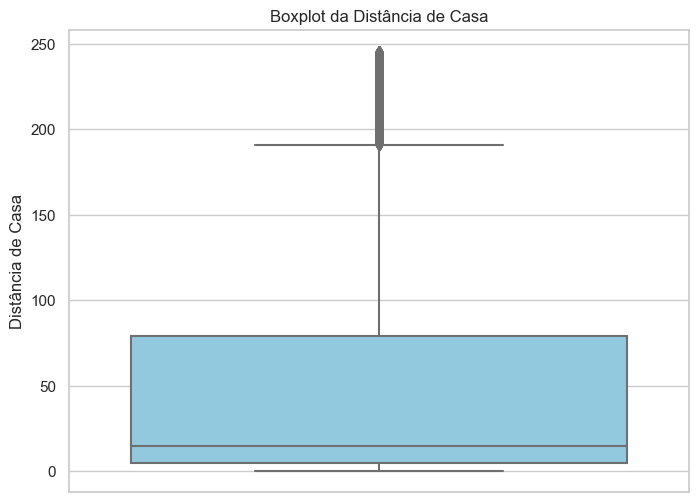

In [1310]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_cleaned_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

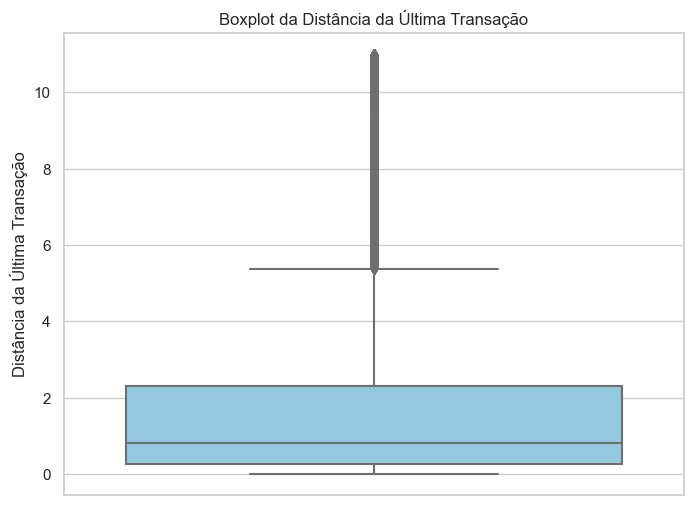

In [1311]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_cleaned_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

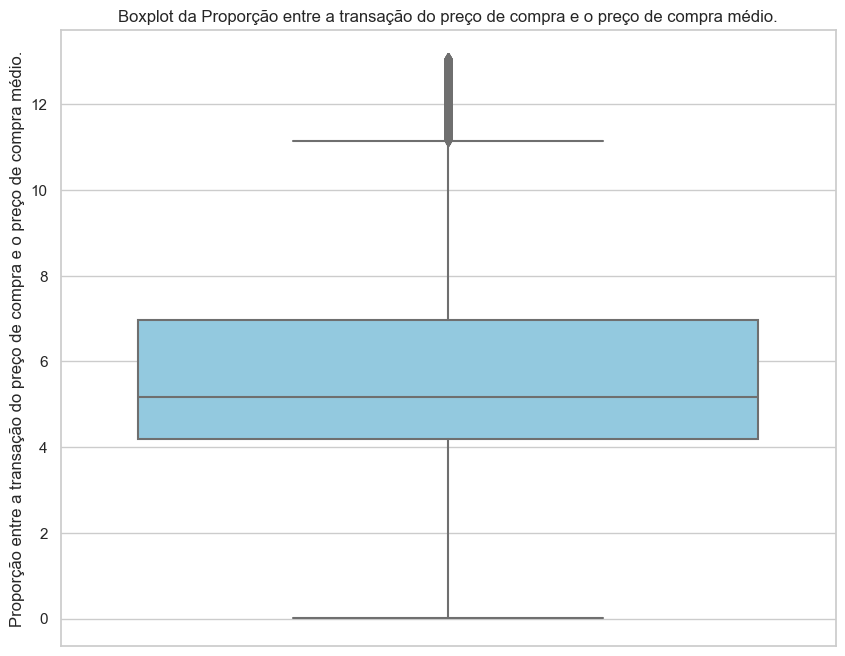

In [1312]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_cleaned_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

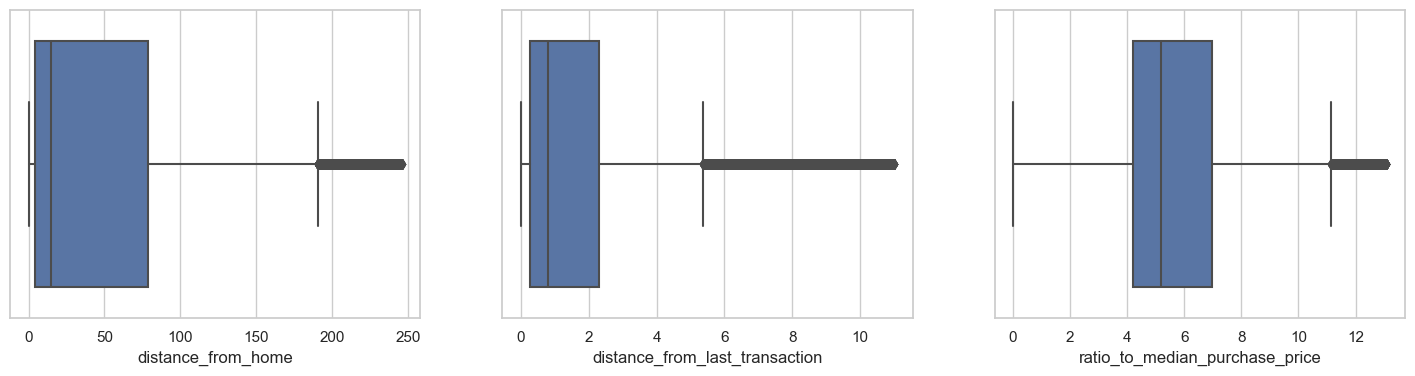

In [1313]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=fraud_cleaned_df, x=col)
plt.show()

## Recursos Categóricos do DATAFRAME SEM OUTLIERS

### Distribuição de Compras em Lojas Repetidas

In [1314]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = fraud_cleaned_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    56562
0.0     7819
Name: count, dtype: int64

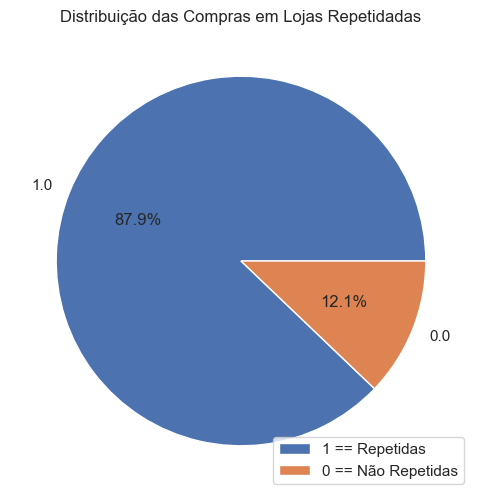

In [1315]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [1316]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = fraud_cleaned_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    46806
1.0    17575
Name: count, dtype: int64

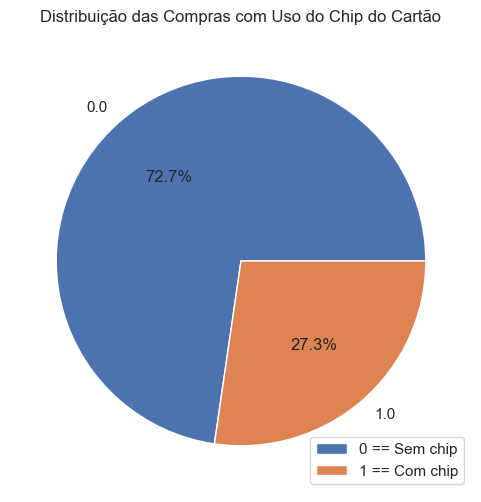

In [1317]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [1318]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = fraud_cleaned_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    64264
1.0      117
Name: count, dtype: int64

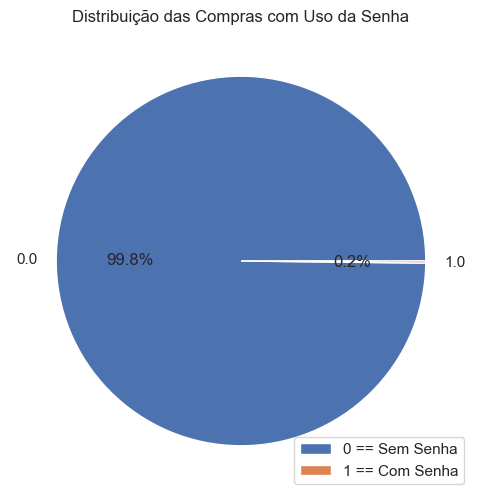

In [1319]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [1320]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = fraud_cleaned_df['online_order'].value_counts()
online_order_count

online_order
1.0    61347
0.0     3034
Name: count, dtype: int64

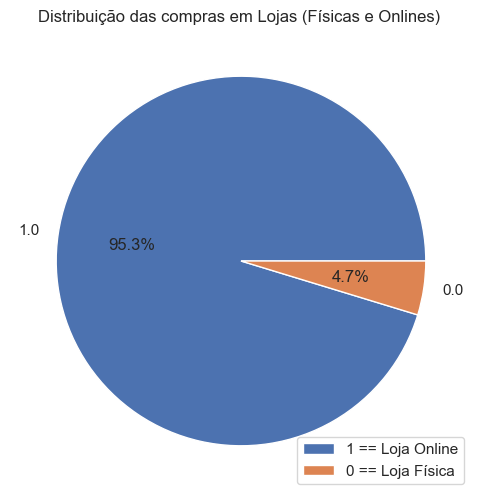

In [1321]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

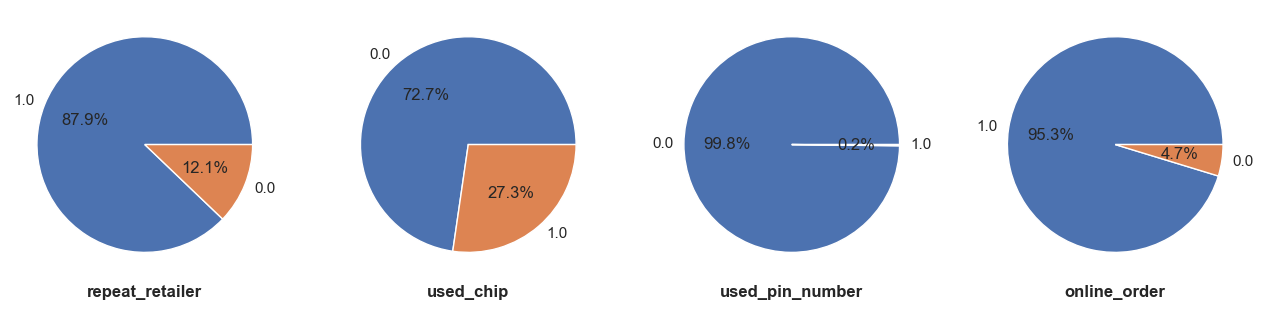

In [1322]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x=fraud_cleaned_df[col].value_counts().values, 
            labels=fraud_cleaned_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Normalização de Recurso Numéricos

In [1323]:
fraud_normalized_df = fraud_cleaned_df

In [1324]:
# Aplicando padronização a recursos numéricos específicos usando StandardScaler
scaler = StandardScaler()
fraud_normalized_df.loc[:, num_features] = scaler.fit_transform(fraud_normalized_df[num_features])

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_20061/3283271722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_normalized_df.loc[:, num_features] = scaler.fit_transform(fraud_normalized_df[num_features])


# Apresentando o DATAFRAME NORMALIZADO

In [1325]:
fraud_normalized_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.331423,-0.091667,-0.281567,1.0,1.0,0.0,1.0
1,-0.592842,-0.085584,-0.182694,1.0,0.0,0.0,1.0
2,-0.725357,0.853364,1.009313,1.0,0.0,0.0,1.0
3,-0.422413,-0.657517,0.235011,1.0,0.0,0.0,1.0
4,1.699372,1.582901,-1.480964,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
64376,0.965638,-0.415519,-1.627966,1.0,0.0,0.0,1.0
64377,-0.028656,-0.387528,1.204826,1.0,0.0,0.0,1.0
64378,1.956267,-0.652979,-1.782592,1.0,0.0,0.0,1.0
64379,1.263913,-0.775801,-1.738413,1.0,0.0,0.0,1.0


# Algumas informações estatísticas do DATAFRAME NORMALIZADO

In [1326]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,64381.0,1.556151e-16,1.000008,-0.766154,-0.694065,-0.530145,0.519830,3.238632
distance_from_last_transaction,64381.0,1.710662e-17,1.000008,-0.777573,-0.661500,-0.419884,0.242876,4.085149
ratio_to_median_purchase_price,64381.0,-3.035045e-18,1.000008,-1.885645,-0.426300,-0.083771,0.546890,2.679636
repeat_retailer,64381.0,8.785511e-01,0.326651,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,64381.0,2.729843e-01,0.445496,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,64381.0,1.817306e-03,0.042591,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,64381.0,9.528743e-01,0.211909,0.000000,1.000000,1.000000,1.000000,1.000000


# Aplicando PCA

In [1327]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(fraud_normalized_df[num_features])
fraud_normalized_df['pca1'] = principal_components[:, 0]
fraud_normalized_df['pca2'] = principal_components[:, 1]

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_20061/2128312792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_normalized_df['pca1'] = principal_components[:, 0]
/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_20061/2128312792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_normalized_df['pca2'] = principal_components[:, 1]


/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_20061/206754341.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=fraud_normalized_df, x='pca1', y='pca2', palette='viridis')


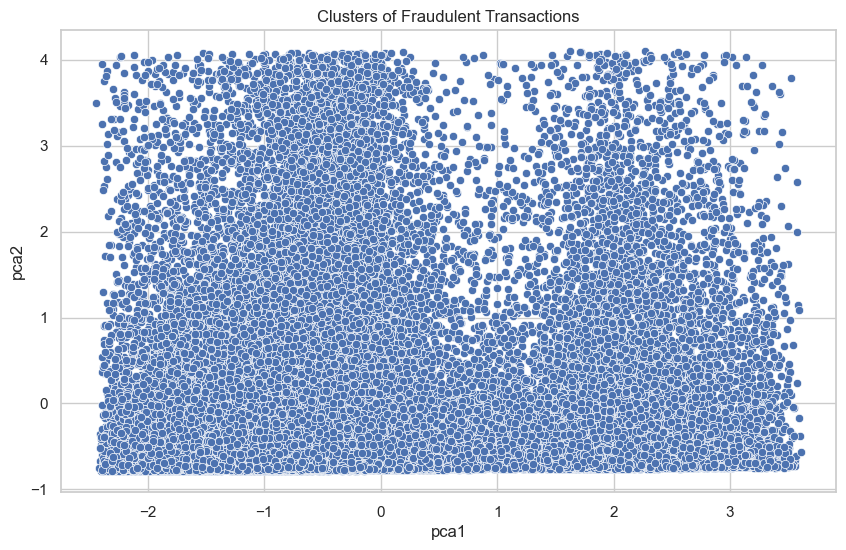

In [1328]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud_normalized_df, x='pca1', y='pca2', palette='viridis')
plt.title('Clusters of Fraudulent Transactions')
plt.show()

# KMEANS Algorithm

### Definicoes

In [1329]:
n_broad_clusters = range(2, 15)
initial_value = 'k-means++'
random_state_value = 0

## Preparação da aplicação do KMEANS

In [1330]:
clusters_distortion = []
for n_clus in n_broad_clusters:
    print(n_clus)
    clusters_distortion.append(KMeans(n_clusters=n_clus, init=initial_value, random_state=random_state_value).fit(fraud_normalized_df).inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14


In [1331]:
clusters_distortion

[285867.46770837257,
 142062.90359163418,
 114329.83109419147,
 98935.25230896099,
 86228.23042115505,
 78309.45215419635,
 75400.69075982702,
 68002.54618575392,
 64178.29609683375,
 60572.54059491193,
 59246.36362353401,
 55291.207547169484,
 52280.27789617979]

## Método do Cotovelo

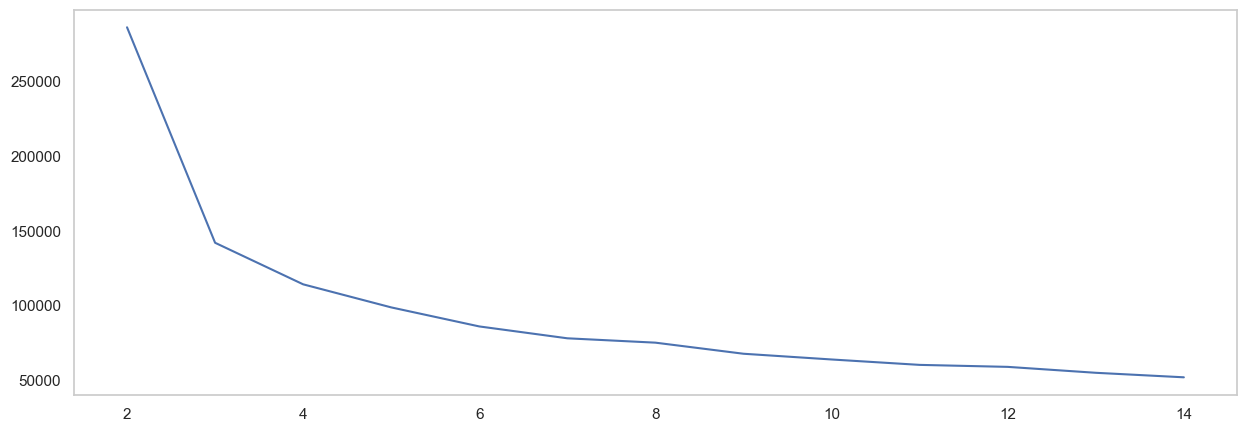

In [1332]:
plt.figure(figsize=(15,5))
plt.plot(n_broad_clusters, clusters_distortion)
plt.grid()

## Cálculo para achar a quantidade ideal de clusters

#### https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [1333]:
x1, y1 = 2, clusters_distortion[0]
x2, y2 = 20, clusters_distortion[len(clusters_distortion)-1]

distances = []
for i in range(len(clusters_distortion)):
    x0 = i+2
    y0 = clusters_distortion[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
num_clus = distances.index(max(distances)) + 2
num_clus

5

## Clusterização

In [1335]:
km = KMeans(n_clusters=num_clus, init=initial_value, random_state=random_state_value)
clusters_classes = km.fit_predict(fraud_normalized_df)
clusters_classes

array([1, 1, 3, ..., 4, 4, 3], dtype=int32)

## Criando uma cópia do dataframe de frauds para anexar os clusters

In [1336]:
clustered_df = fraud_cleaned_df

## Anexando os agrupamentos em suas linhas especificas no dataframe

In [1337]:
clustered_df.loc[:, 'clus'] = clusters_classes
clustered_df

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_20061/309133831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df.loc[:, 'clus'] = clusters_classes


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,pca1,pca2,clus
0,-0.331423,-0.091667,-0.281567,1.0,1.0,0.0,1.0,-0.034579,-0.093025,1
1,-0.592842,-0.085584,-0.182694,1.0,0.0,0.0,1.0,-0.289379,-0.089098,1
2,-0.725357,0.853364,1.009313,1.0,0.0,0.0,1.0,-1.232806,0.844880,3
3,-0.422413,-0.657517,0.235011,1.0,0.0,0.0,1.0,-0.460048,-0.661234,1
4,1.699372,1.582901,-1.480964,1.0,0.0,0.0,1.0,2.237200,1.599692,2
...,...,...,...,...,...,...,...,...,...,...
64376,0.965638,-0.415519,-1.627966,1.0,0.0,0.0,1.0,1.836949,-0.403287,4
64377,-0.028656,-0.387528,1.204826,1.0,0.0,0.0,1.0,-0.869354,-0.391777,3
64378,1.956267,-0.652979,-1.782592,1.0,0.0,0.0,1.0,2.648476,-0.633314,4
64379,1.263913,-0.775801,-1.738413,1.0,0.0,0.0,1.0,2.128585,-0.761107,4


### Selecionando os dados de um cluster específico

In [1338]:
clustered_df.loc[fraud_normalized_df.clus==0]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,pca1,pca2,clus
15,-0.162289,3.745064,0.128277,1.0,0.0,0.0,1.0,-0.232842,3.743388,0
17,-0.648791,1.003457,0.117708,1.0,1.0,0.0,1.0,-0.549317,0.998507,0
26,-0.447051,1.164975,-0.164841,1.0,0.0,0.0,1.0,-0.208062,1.162380,0
37,-0.666397,1.502139,0.274735,1.0,0.0,0.0,1.0,-0.676445,1.496523,0
51,-0.658141,1.319356,-0.434613,1.0,0.0,0.0,1.0,-0.167695,1.316194,0
...,...,...,...,...,...,...,...,...,...,...
64364,-0.621156,1.267059,-0.429909,1.0,0.0,0.0,1.0,-0.144487,1.264141,0
64368,-0.530233,1.123946,-0.397139,1.0,0.0,0.0,1.0,-0.102322,1.121555,0
64370,-0.564604,2.449710,1.056839,1.0,1.0,0.0,1.0,-1.164420,2.442138,0
64373,-0.661202,1.810608,0.162287,1.0,0.0,0.0,1.0,-0.595516,1.805398,0


# Visualizando os clusters

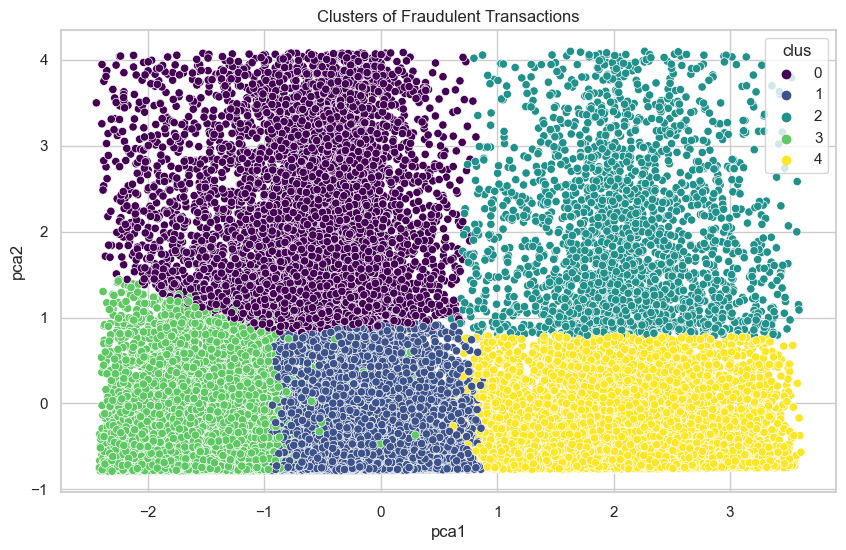

In [1339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='pca1', y='pca2', hue='clus', palette='viridis')
plt.title('Clusters of Fraudulent Transactions')
plt.show()

# Apresentando padrões ocultos separadamente para características numéricas e categóricas

In [1340]:
# Clusters únicos em ordem crescente
clusters = sorted(clustered_df['clus'].unique())

# Número de colunas para os subplots
num_cols = len(clusters)

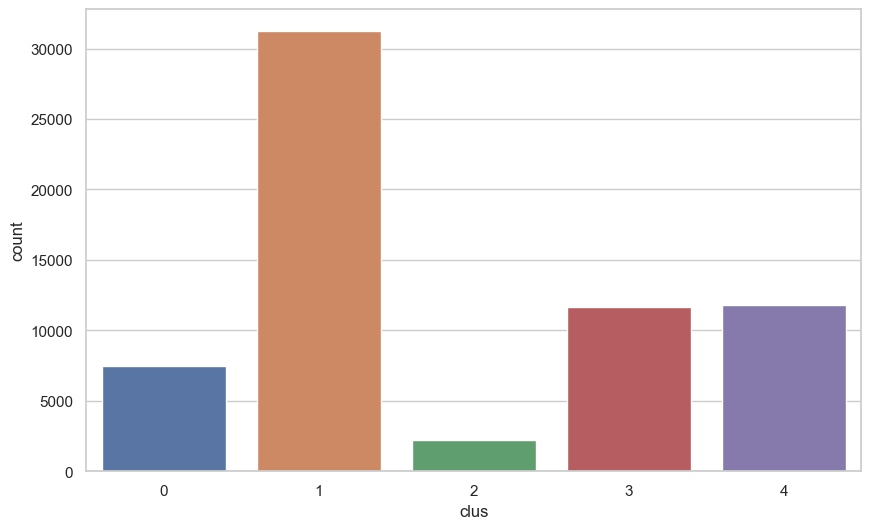

In [1341]:
# Gráfico de barras (countplot) para a coluna 'clus'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='clus', data=clustered_df)

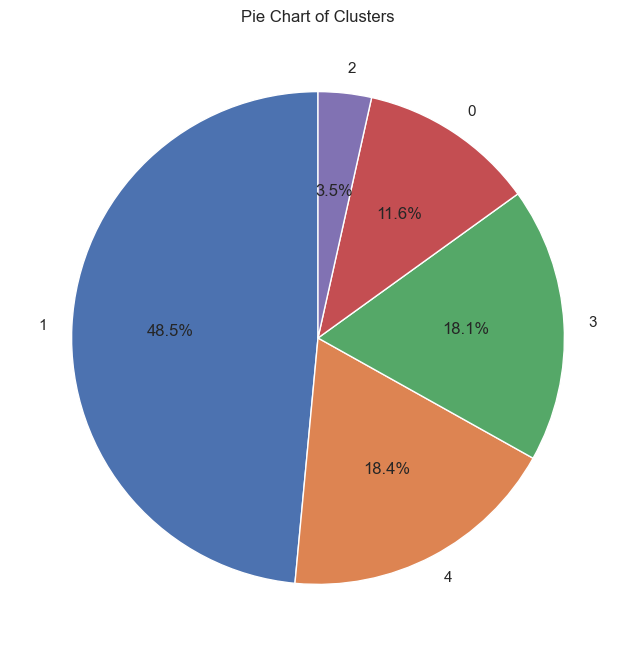

In [1342]:
# Gráfico de pizza para a coluna 'clus'
cluster_counts = clustered_df['clus'].value_counts()
plt.figure(figsize=(8, 8))
cluster_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Pie Chart of Clusters')
plt.ylabel('')
plt.show()

## Análise geral dos recursos numéricos

In [1343]:
# Criar histogramas para cada característica numérica por cluster
#for column in num_features:
#    plt.figure(figsize=(10, 6))
#    sns.histplot(data=clustered_df, x=column, hue='clus', multiple="dodge", kde=True)
#    plt.title(f'Histogram of {column} by cluster')
#    plt.xlabel(column)
#    plt.ylabel('Count')
#    plt.show()

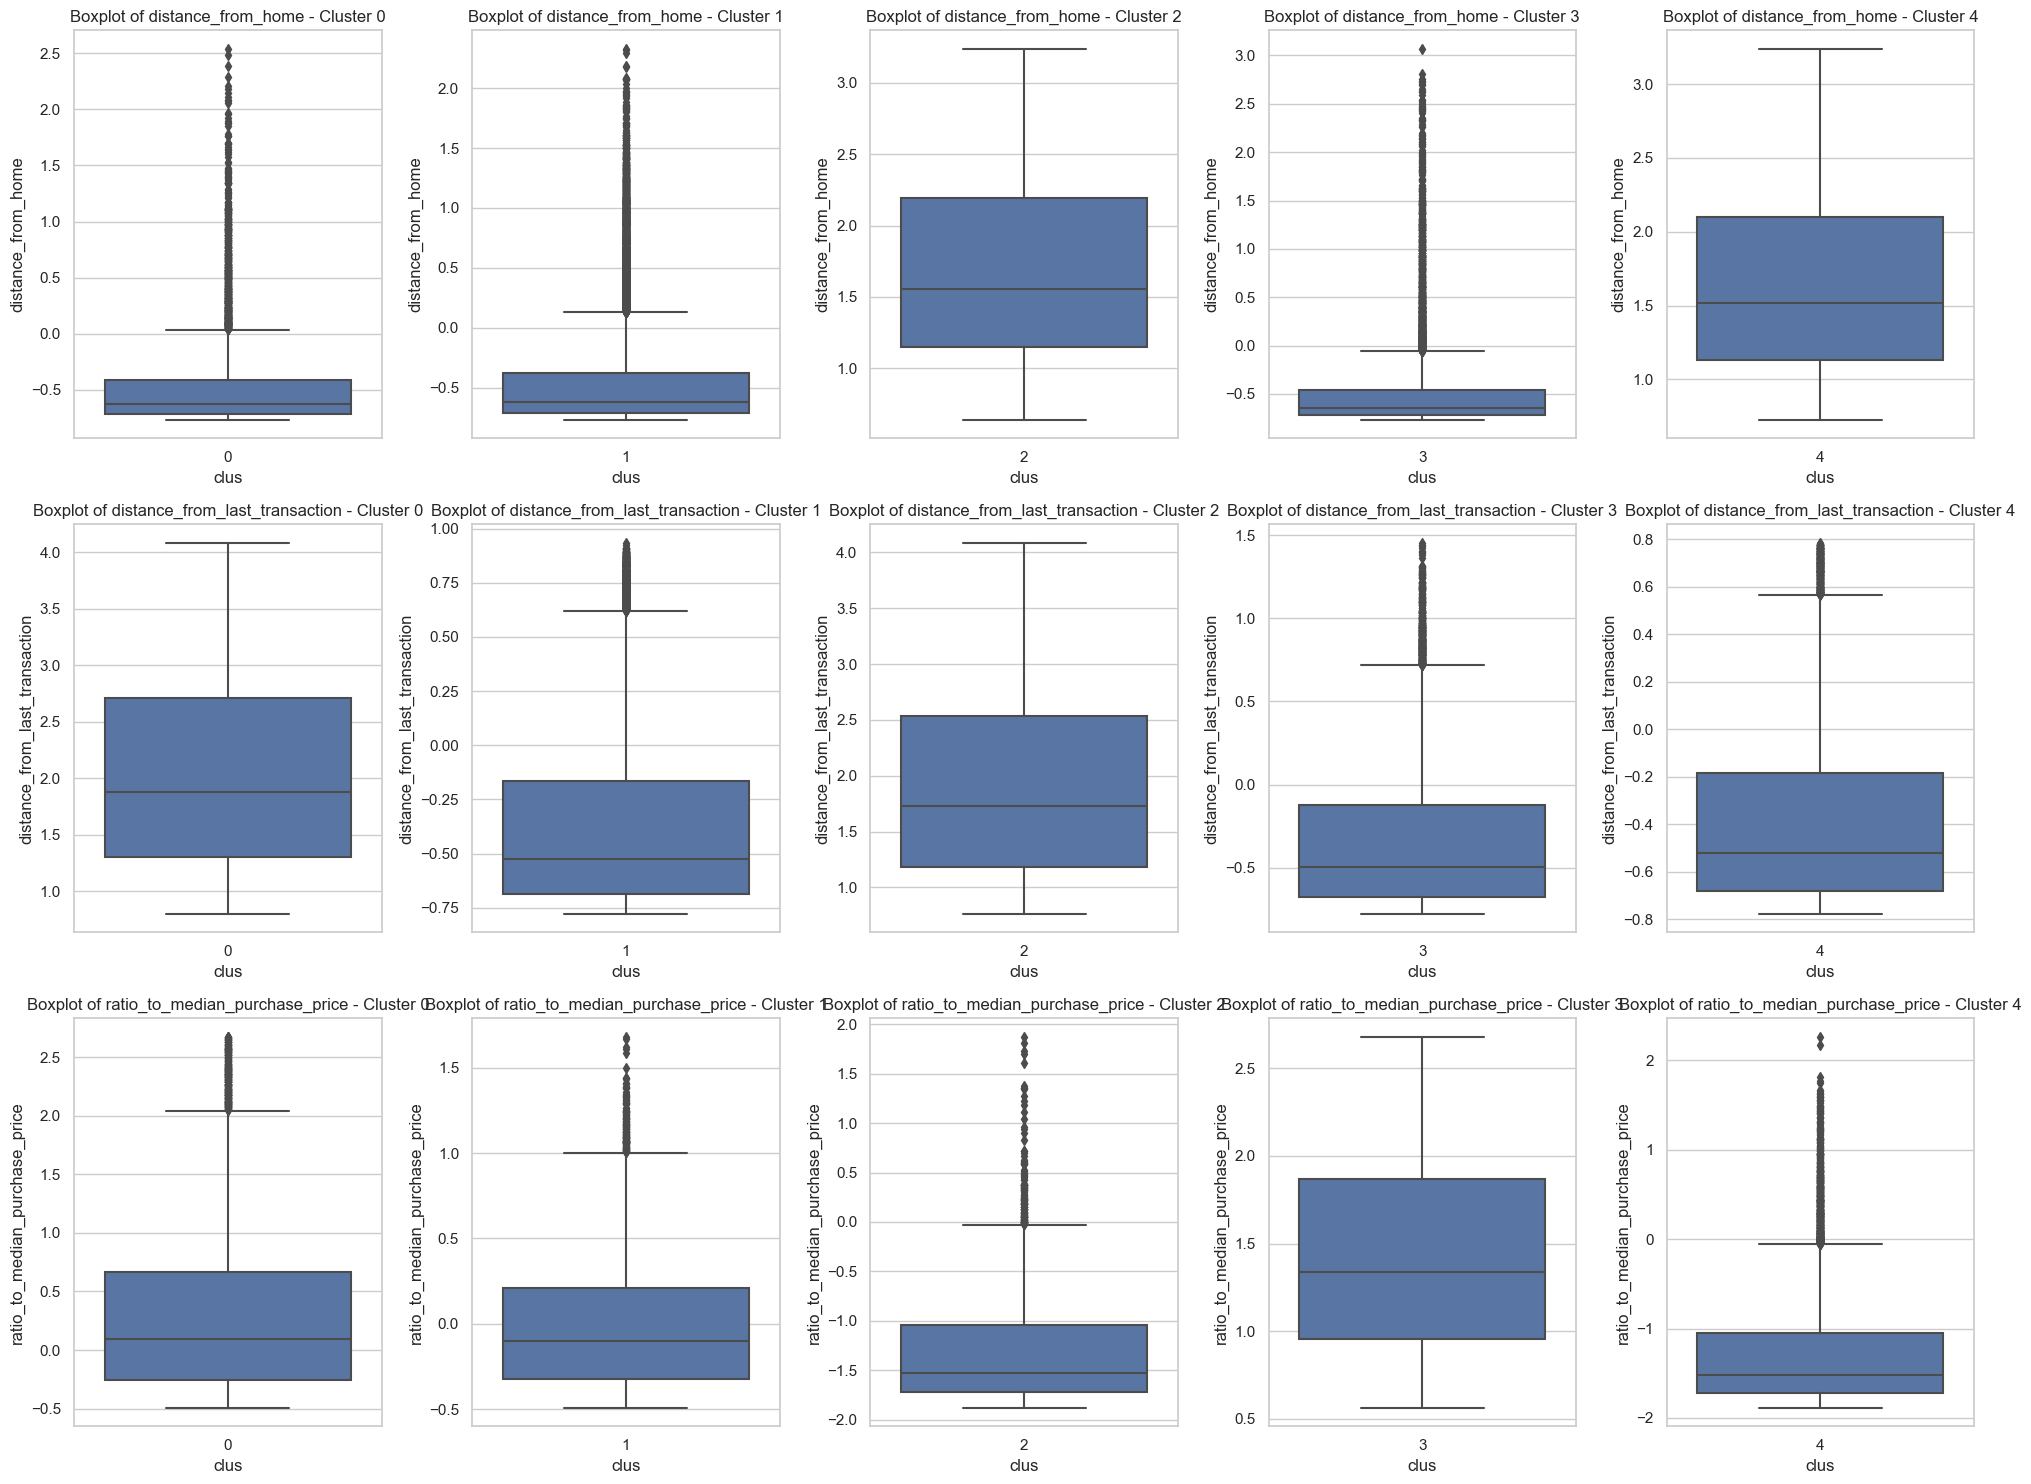

In [1344]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando boxplots para cada característica numérica por cluster
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features):
    for j, cluster in enumerate(clusters):
        plt.subplot(len(num_features), num_cols, i * num_cols + j + 1)
        cluster_data = clustered_df[clustered_df['clus'] == cluster]
        sns.boxplot(x='clus', y=col, data=cluster_data)
        plt.title(f'Boxplot of {col} - Cluster {cluster}')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

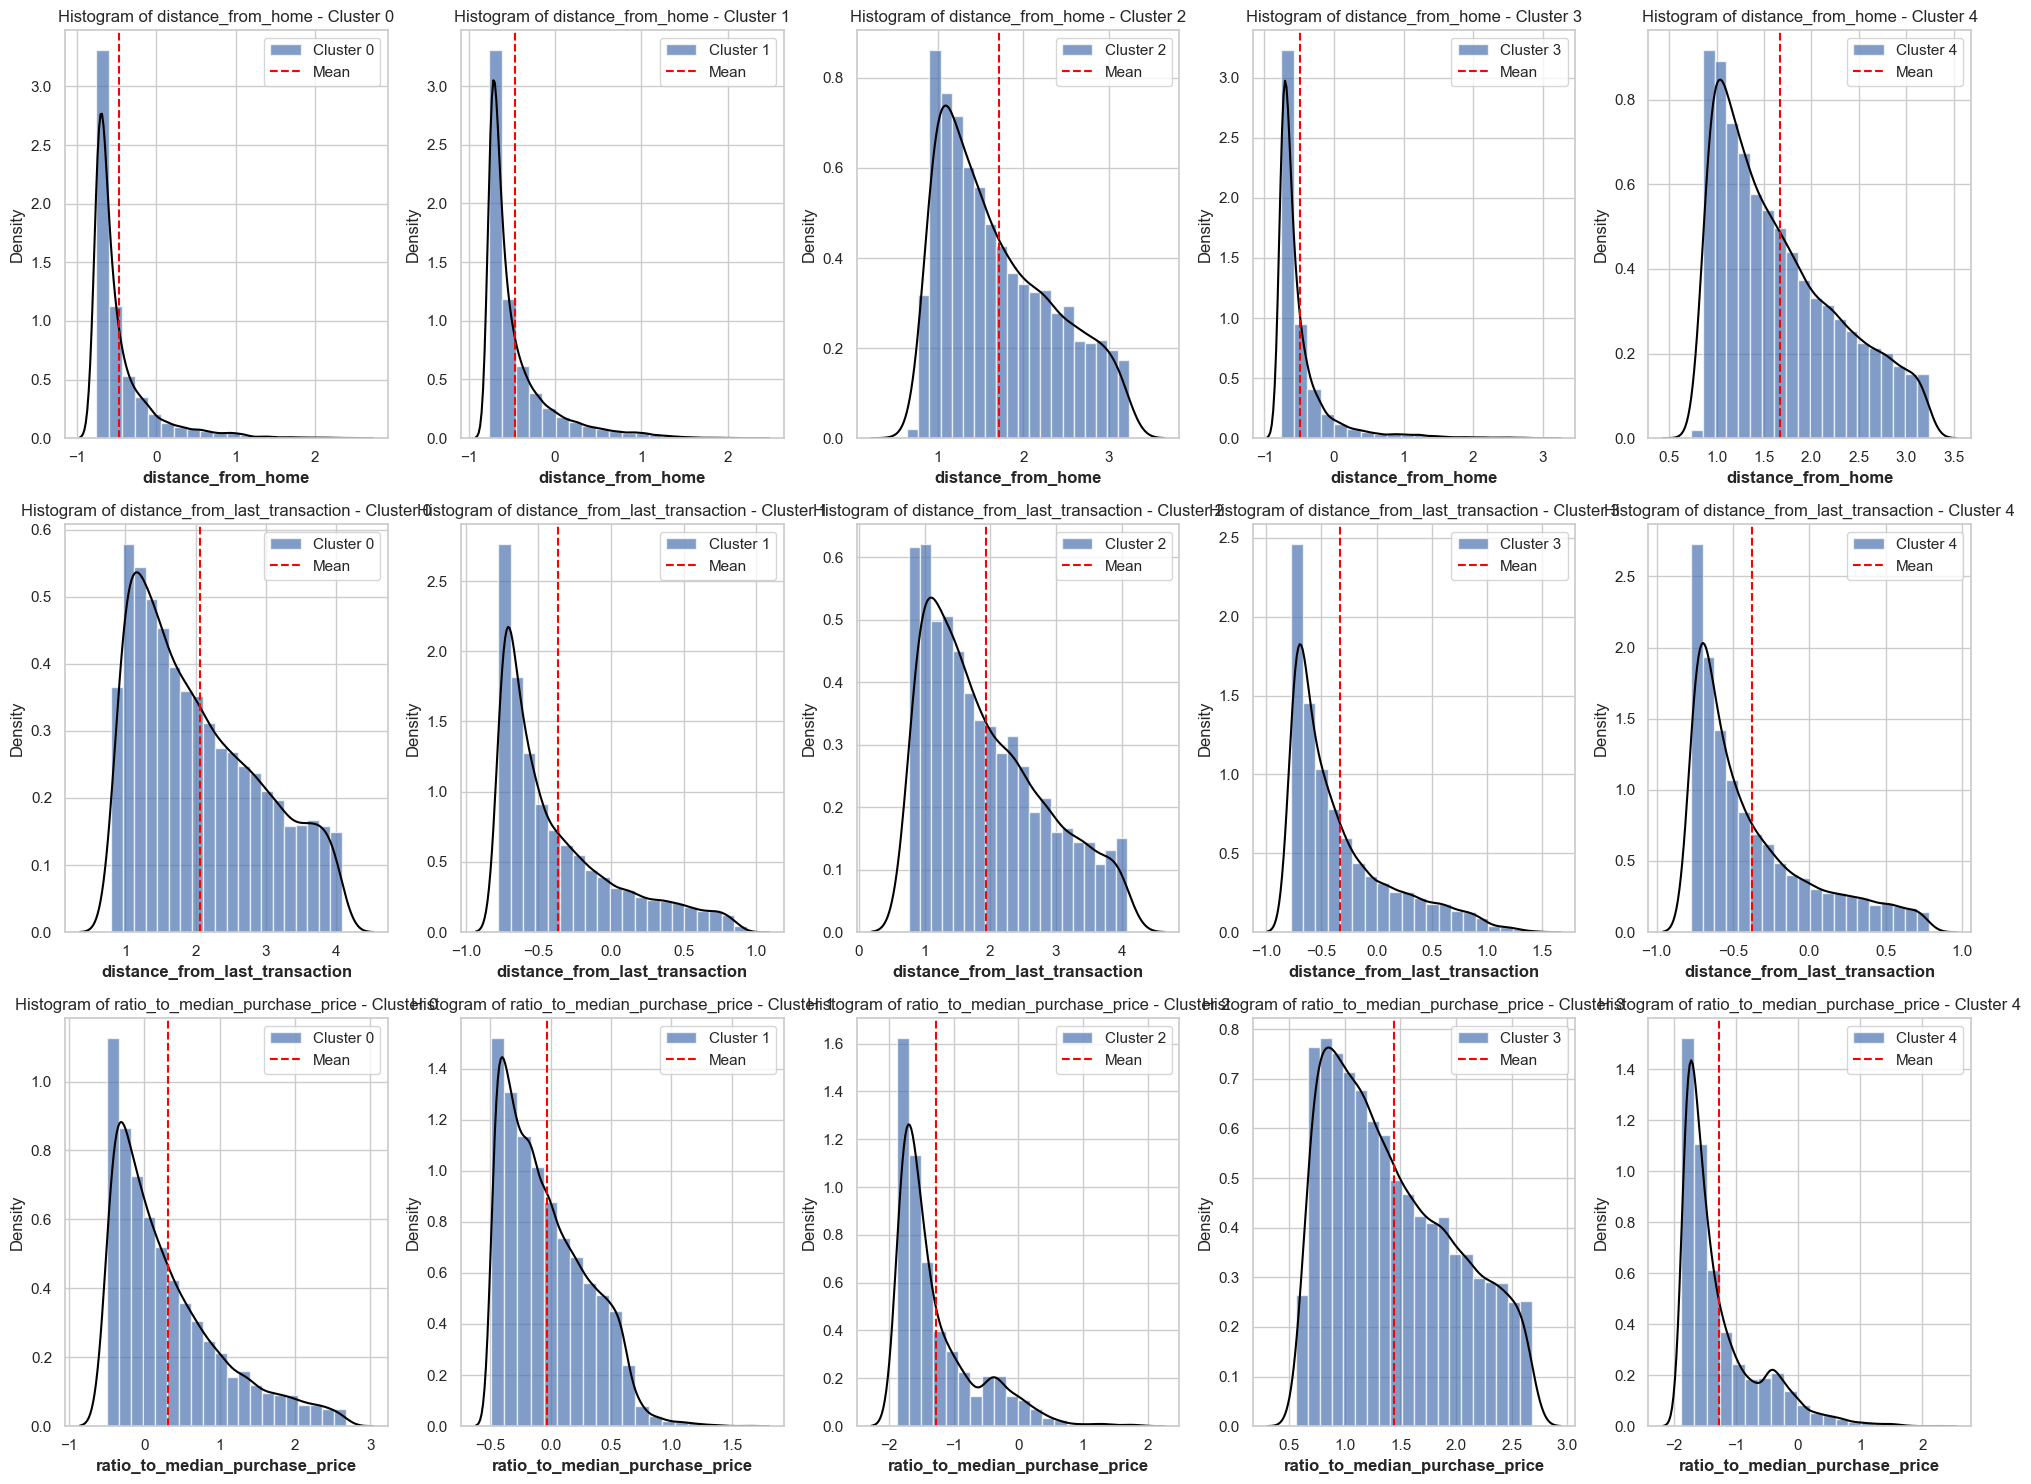

In [1345]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando histogramas para cada característica numérica por cluster
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features):
    for j, cluster in enumerate(clusters):
        plt.subplot(len(num_features), num_cols, i * num_cols + j + 1)
        cluster_data = clustered_df[clustered_df['clus'] == cluster]
        plt.hist(cluster_data[col], bins=20, alpha=0.7, label=f'Cluster {cluster}', density=True)
        sns.kdeplot(cluster_data[col], color='black', linestyle='solid', linewidth=1.5)
        plt.axvline(cluster_data[col].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        plt.xlabel(col, weight='bold')
        plt.ylabel('Density')
        plt.title(f'Histogram of {col} - Cluster {cluster}')
        plt.legend()
plt.tight_layout()
plt.show()

## Análise geral para recursos categóricos

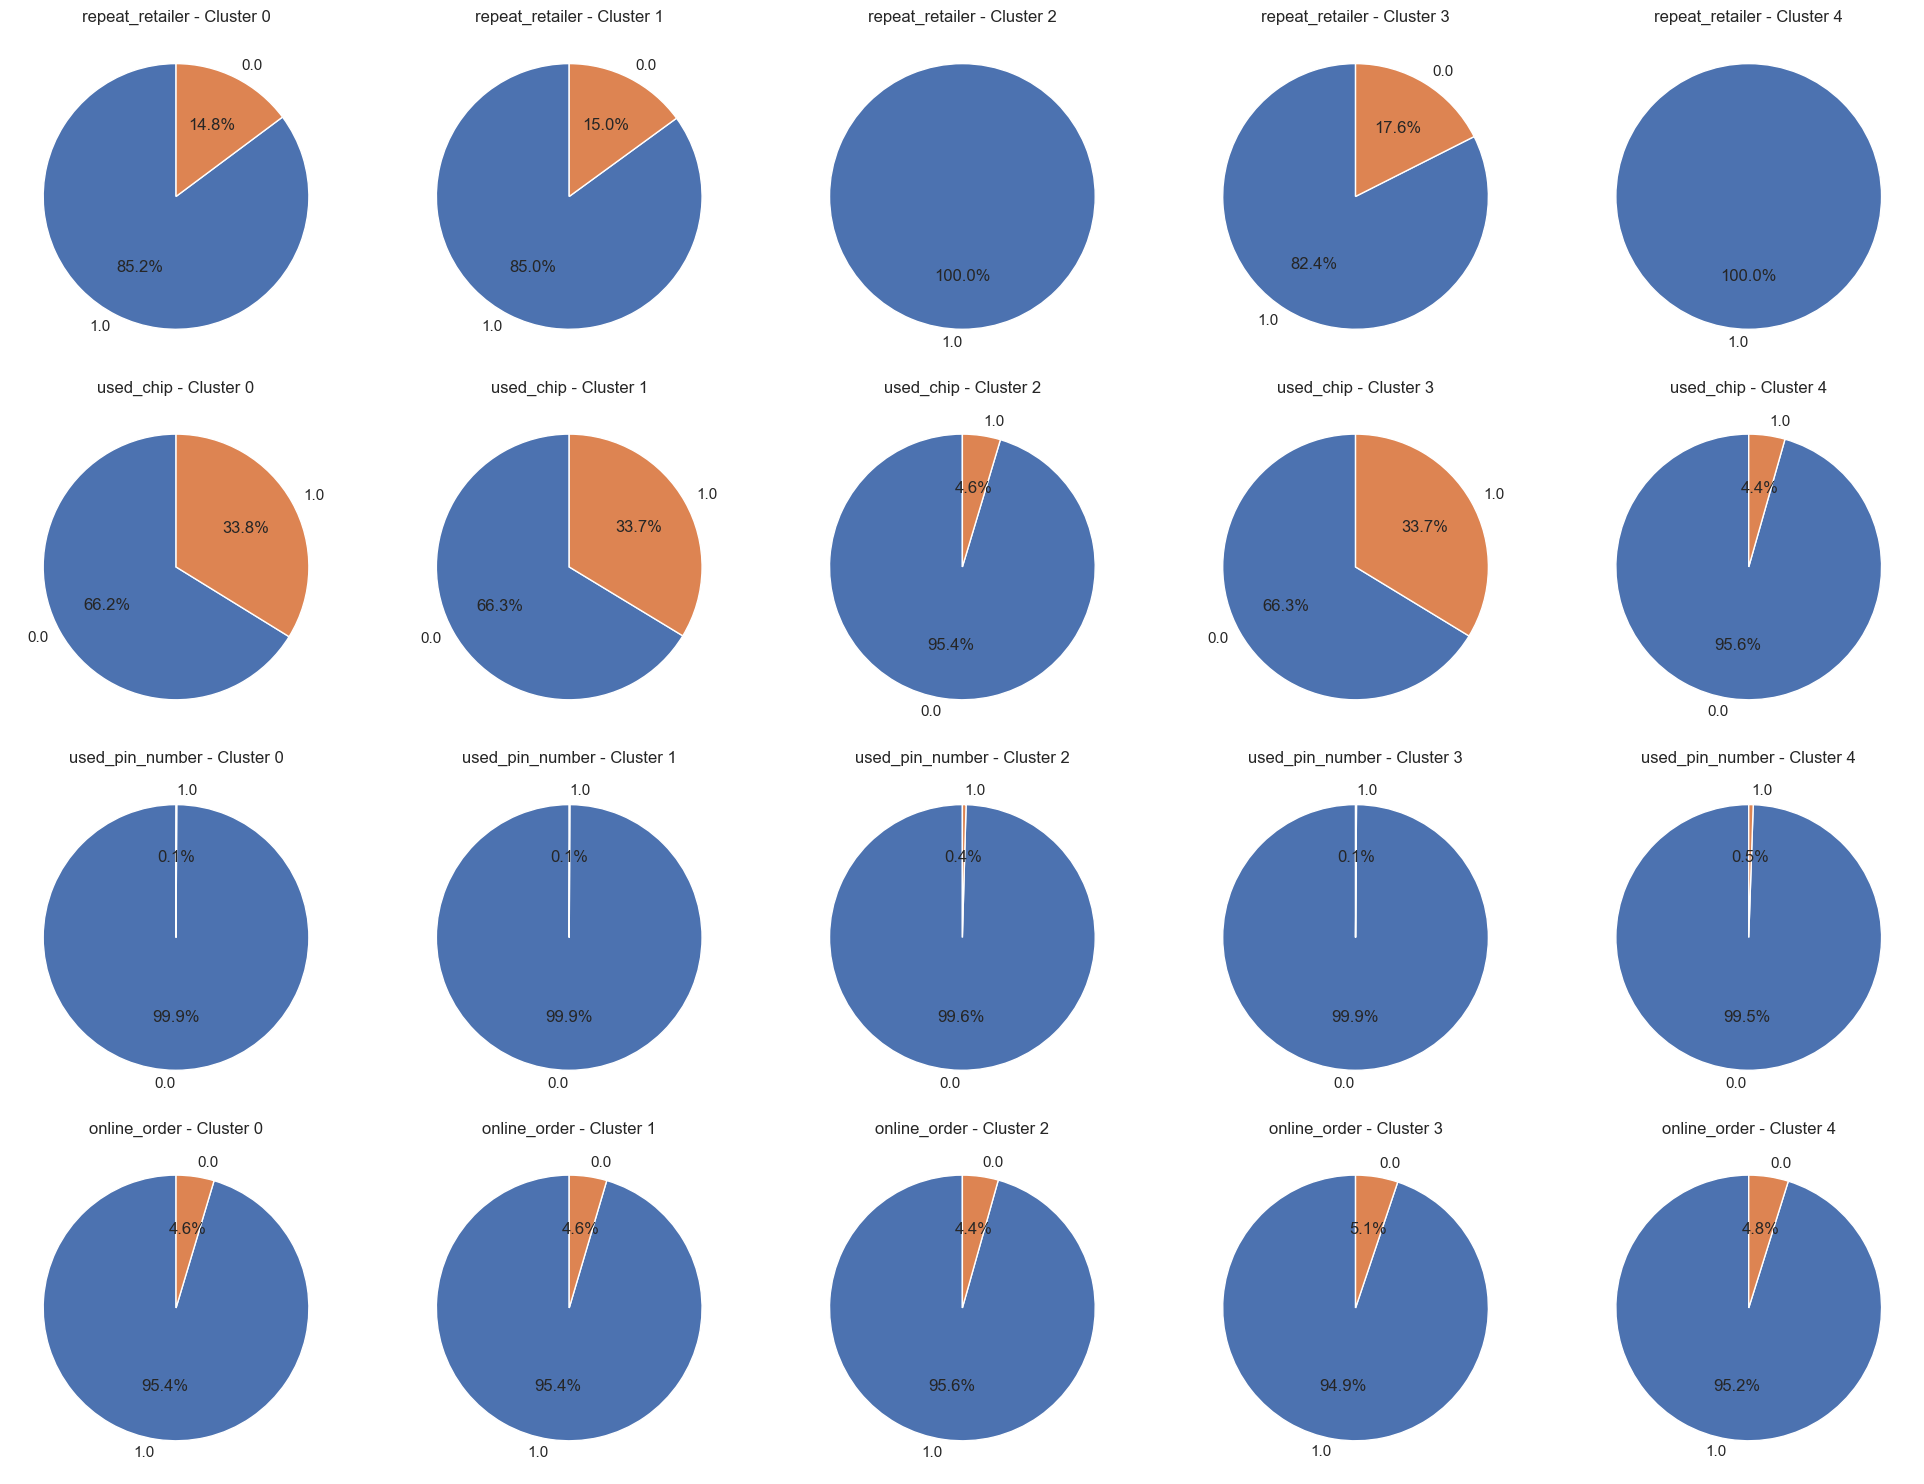

In [1346]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando gráficos de pizza para cada coluna categórica por cluster
plt.figure(figsize=(20, 15))
for i, col in enumerate(category_features):
    for j, cluster in enumerate(clusters):
        plt.subplot(len(category_features), num_cols, i * num_cols + j + 1)
        cluster_data = clustered_df[clustered_df['clus'] == cluster]
        counts = cluster_data[col].value_counts()
        plt.pie(x=counts.values, 
                labels=counts.index, 
                autopct='%1.1f%%', startangle=90)
        plt.title(f'{col} - Cluster {cluster}')
plt.tight_layout()
plt.show()

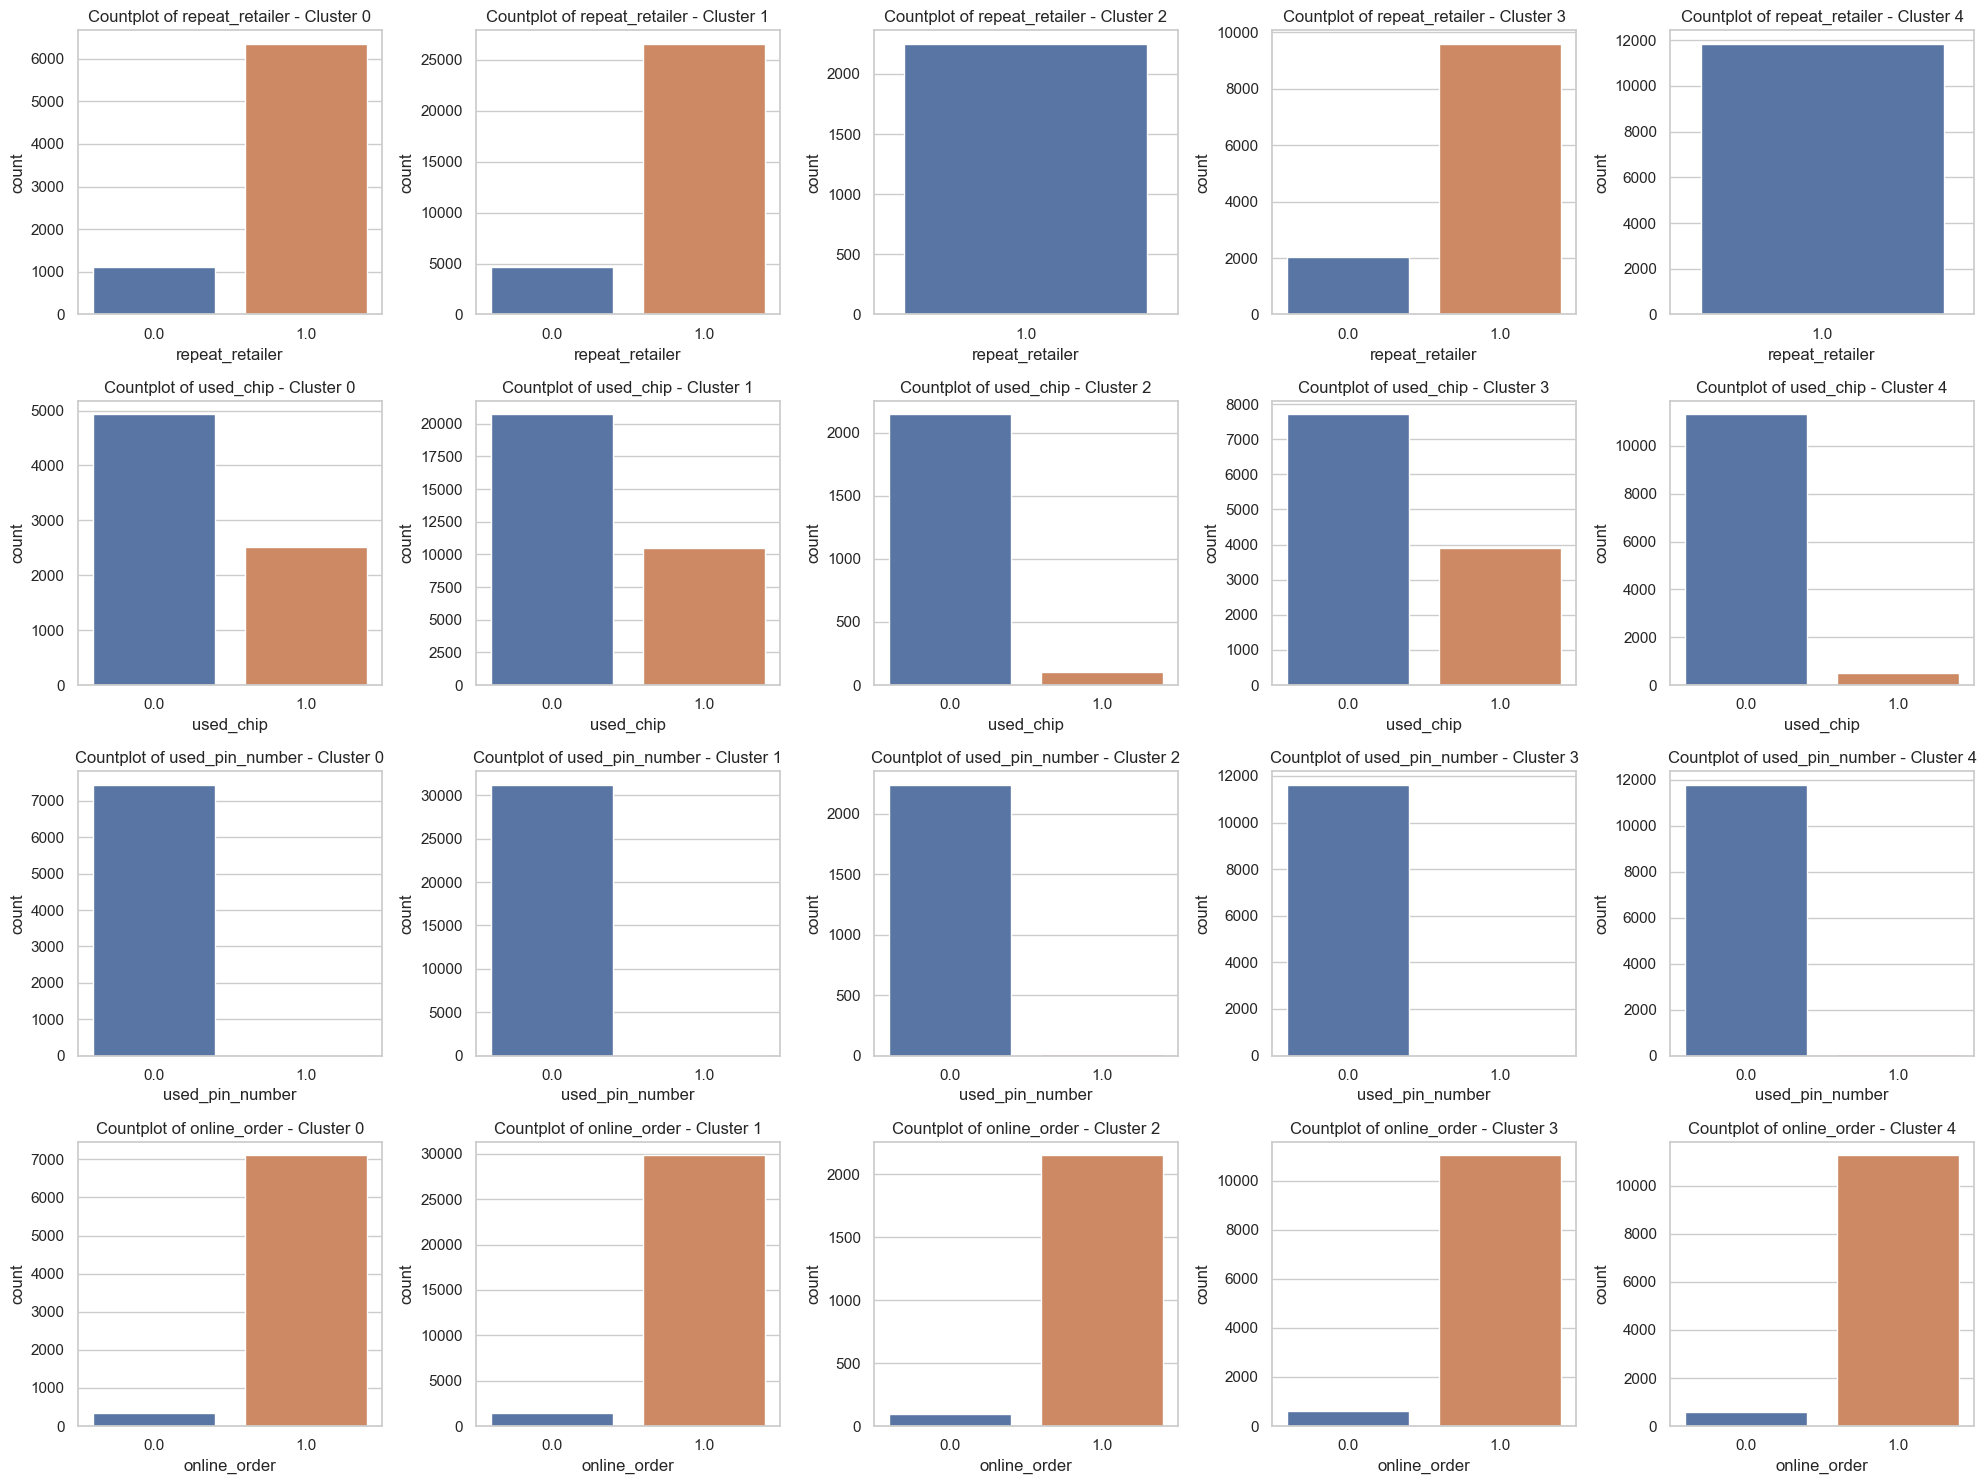

In [1347]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando countplots para cada coluna categórica por cluster
plt.figure(figsize=(20, 15))
for i, col in enumerate(category_features):
    for j, cluster in enumerate(clusters):
        plt.subplot(len(category_features), num_cols, i * num_cols + j + 1)
        cluster_data = clustered_df[clustered_df['clus'] == cluster]
        sns.countplot(x=col, data=cluster_data)
        plt.title(f'Countplot of {col} - Cluster {cluster}')
plt.tight_layout()
plt.show()

## Análise de cada cluster separadamente

In [1348]:
for cluster in range(num_clus):
    cluster_data = clustered_df[clustered_df['clus'] == cluster]
    print(f'Cluster {cluster} Description:')
    print(cluster_data.describe(include='all').T)


Cluster 0 Description:
                                 count      mean       std       min  \
distance_from_home              7445.0 -0.474508  0.397596 -0.766154   
distance_from_last_transaction  7445.0  2.062981  0.887299  0.799008   
ratio_to_median_purchase_price  7445.0  0.309089  0.719781 -0.492419   
repeat_retailer                 7445.0  0.851981  0.355142  0.000000   
used_chip                       7445.0  0.337945  0.473041  0.000000   
used_pin_number                 7445.0  0.000806  0.028379  0.000000   
online_order                    7445.0  0.953794  0.209944  0.000000   
pca1                            7445.0 -0.569156  0.551182 -2.442137   
pca2                            7445.0  2.058570  0.887076  0.793838   
clus                            7445.0  0.000000  0.000000  0.000000   

                                     25%       50%       75%       max  
distance_from_home             -0.712604 -0.625986 -0.412428  2.538465  
distance_from_last_transaction  1.3016